# Online Payments Fraud Detection

# Problem Statement

Project Aim:the goal of this project is to build a machine learning model that can accurately predict payment fraud by distinuguishing between legitimate and fraudulent trnasactions based on their characteristics,such as transaction amount,type,and accounts involved.By using a dataset of both fraudulent and non-fraudulent finalcial transactions, the model can be trained to achieve high accuracy,which can be used by financial institutions to prevent financial losses and protect their customers's assets in real-time..


In [1]:
#import library's
import numpy as np #linear algebra.
import pandas as pd #data manipulation
import matplotlib.pyplot as plt  #visualize 
import seaborn as sns #visualize 

In [3]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [4]:
#no.of row and columns
df.shape

(6362620, 11)

# Data Description:

1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction
ansaction

# Exploratory Data Analysis

In [50]:
#Getting top 10 datafrom data from dataset.
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [51]:
#Getting top last 10 data from dataset.
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [52]:
#Getting columns info
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [53]:
#Getting shape of dataset..
df.shape

(6362620, 11)

In [54]:
#Getting basic information about dataset..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [55]:
#Getting Statistical Description About Datasets..
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Data Cleaning


In [56]:
#Now Checking whether this data contains any type of null value or not..
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [57]:
#Checking for Unique values from the datasets..
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [58]:
#Checking whether it has Duplicate data or not
df.duplicated().sum()


0

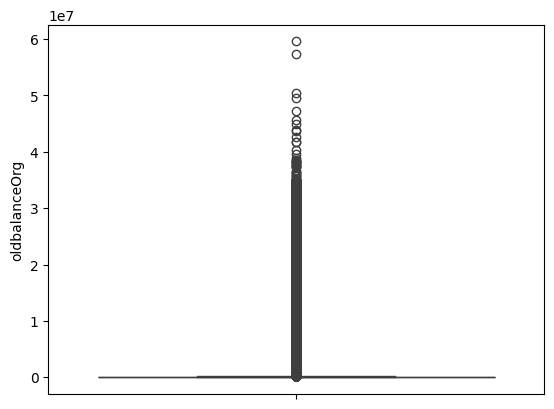

In [65]:

sns.boxplot(df.oldbalanceOrg)
plt.show()

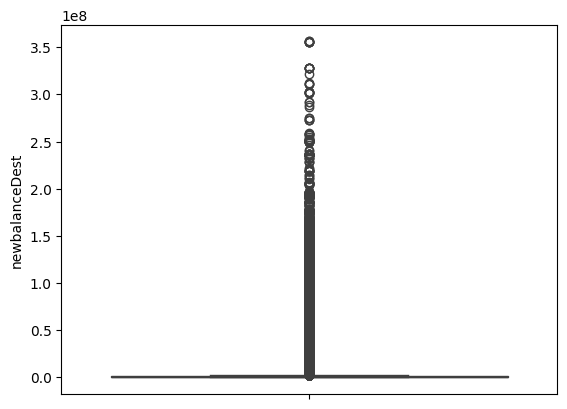

In [68]:
sns.boxplot(df['newbalanceDest'])
plt.show()

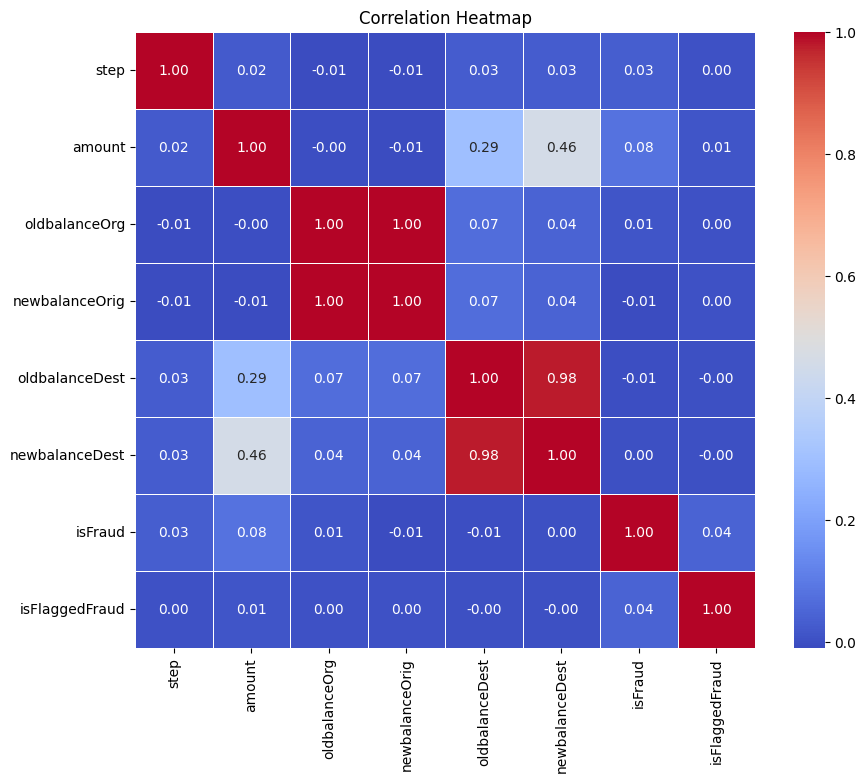

In [74]:
#Now checking correlation two features..

corr_df = df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']]

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

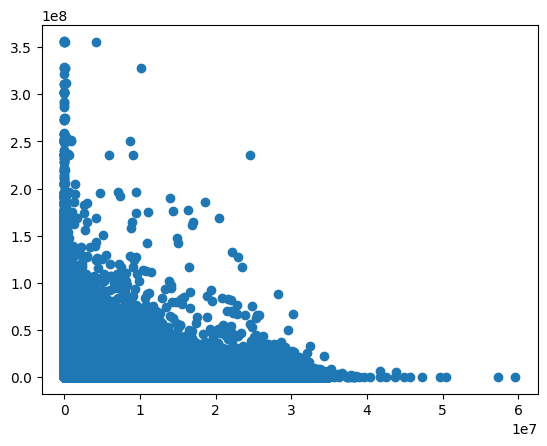

In [75]:
plt.scatter(df.oldbalanceOrg, df.newbalanceDest)
plt.show()

<Axes: ylabel='count'>

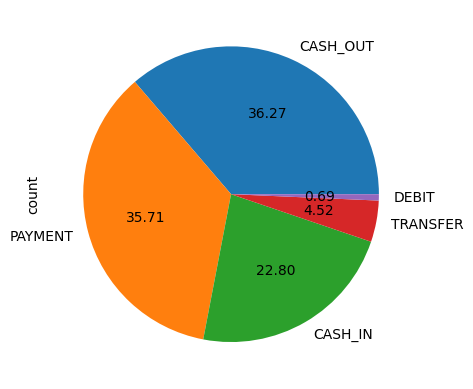

In [114]:
df.type.value_counts().plot(kind  = 'pie',autopct = "%.2f")


# Outliers Detection

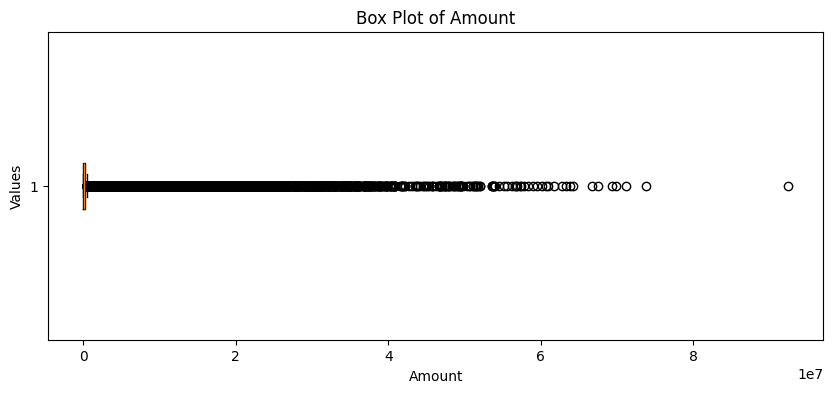

In [59]:
#Using InterQuartile Range Method We can easily Remove the Outliers from dataset.

plt.figure(figsize=(10,4))
plt.boxplot(df['amount'],vert=False)



plt.xlabel('Amount')
plt.ylabel("Values")
plt.title("Box Plot of Amount")
plt.show()

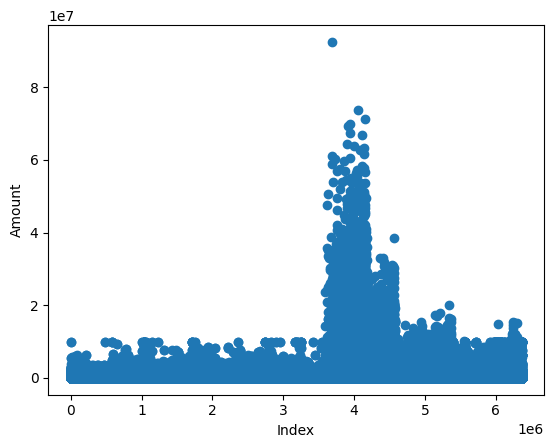

In [62]:
#Using scatter Plot.. visualizing outliers.

#Using scatter Plot.. visualizing outliers.

plt.scatter(df.index,df['amount'])
plt.xlabel('Index')
plt.ylabel("Amount")

plt.show()

In [80]:
#Removing Outliers From the Datasets..

Q1 = np.percentile(df['amount'],25)

Q3 = np.percentile(df['amount'],75)


print(Q1 , " " ,Q3)

13389.57   208721.4775


In [81]:
IQR = Q3 - Q1 

print(IQR)

195331.9075


In [82]:
upper =Q3 + 1.5 * IQR
lower = Q1 - 1.5*IQR


print(upper , " ",lower)

501719.33875   -279608.29125


In [83]:
upper = np.where(df['amount'] >= (Q3+1.5*IQR))
lower = np.where(df['amount'] <= (Q1-1.5*IQR))

In [85]:
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

In [89]:
# We removed 3,38,078 Outliers from Amount Features..

df['amount'].shape

(6024542,)

In [5]:
#Checking how many type of trasaction was done..
df.type.head()

0     PAYMENT
1     PAYMENT
2    TRANSFER
3    CASH_OUT
4     PAYMENT
Name: type, dtype: object

In [102]:
#Checking Uniques Transaction Types..
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [104]:
#Counting the occurence of Transaction Types
df.type.value_counts()

type
CASH_OUT    2185249
PAYMENT     2151495
CASH_IN     1373826
TRANSFER     272542
DEBIT         41430
Name: count, dtype: int64

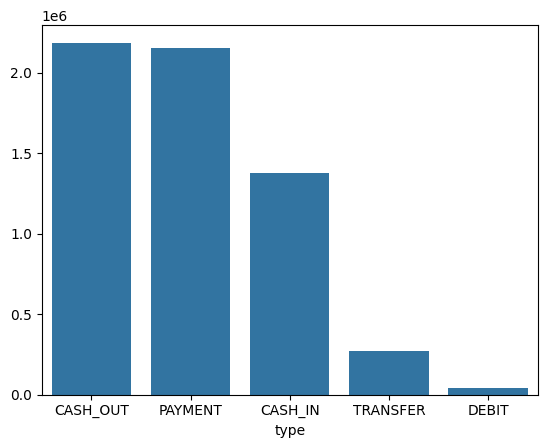

In [106]:
#it looks like that cash out takes the most of the data and then payment so we can conclude that the most of fraud will be in this two types
sns.barplot(x = df.type.value_counts().index, y = df.type.value_counts().values)
plt.show()

In [108]:
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.024542e+06,6.024542e+06,6.024542e+06,6.024542e+06,6.024542e+06,6.024542e+06,6.024542e+06,6.024542e+06
mean,2.433126e+02,1.115342e+05,8.619579e+05,8.859130e+05,9.871265e+05,1.037883e+06,7.235405e-04,3.319754e-07
std,1.422881e+02,1.203983e+05,2.933837e+06,2.969976e+06,3.031559e+06,3.055336e+06,2.688898e-02,5.761731e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.236854e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,6.317582e+04,1.514600e+04,0.000000e+00,1.027301e+05,1.683203e+05,0.000000e+00,0.000000e+00
75%,3.340000e+02,1.829338e+05,1.134380e+05,1.602874e+05,8.249873e+05,9.251457e+05,0.000000e+00,0.000000e+00
max,7.430000e+02,5.017184e+05,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [109]:
df.amount

0            9839.64
1            1864.28
2             181.00
3             181.00
4           11668.14
             ...    
6362609    258355.42
6362610     63416.99
6362611     63416.99
6362614    339682.13
6362615    339682.13
Name: amount, Length: 6024542, dtype: float64

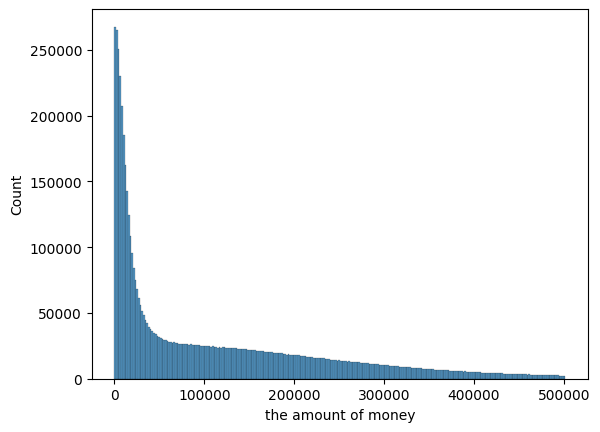

In [112]:

sns.histplot(df.amount)
plt.xlabel('the amount of money')
plt.show()

In [113]:
#checking the Most 10 Largest Amount
df.nlargest(10, 'amount')


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1737199,161,CASH_OUT,501718.41,C1077569708,78605.00,0.00,C1924590813,697311.14,1199029.56,0,0
1082806,129,CASH_IN,501718.02,C970634468,20873140.30,21374858.32,C1091756447,5463193.08,5127569.29,0,0
2827303,226,CASH_OUT,501717.55,C855812747,121947.70,0.00,C914557298,1379104.08,1880821.63,0,0
2069077,181,CASH_IN,501717.33,C897630635,5120317.65,5622034.98,C1830915224,1314756.05,813038.72,0,0
5280111,372,CASH_OUT,501715.41,C555809067,96128.79,0.00,C1185830080,664493.22,1166208.64,0,0
2984534,231,CASH_IN,501715.19,C1586580516,4122.00,505837.19,C1796738748,0.00,0.00,0,0
1638216,157,CASH_IN,501710.64,C843040970,430.00,502140.64,C1864097021,0.00,0.00,0,0
2025441,180,CASH_IN,501710.41,C1109167155,14682491.62,15184202.03,C145739790,6008879.39,5507168.98,0,0
823098,41,TRANSFER,501709.63,C585977042,9846.00,0.00,C876306094,5932706.69,6434416.32,0,0
58903,9,CASH_OUT,501709.34,C1194171106,0.00,0.00,C783487,2929191.69,23709.21,0,0


In [135]:
df['balance_diff'] = df.oldbalanceOrg - df.newbalanceOrig


# Data Preprocessing


In [140]:
df.isFraud.value_counts()


isFraud
0    6020183
1       4359
Name: count, dtype: int64

# the fradud data is very very small fraud cases about 0.1% so to avoid any missclassifications we will balance the dataset


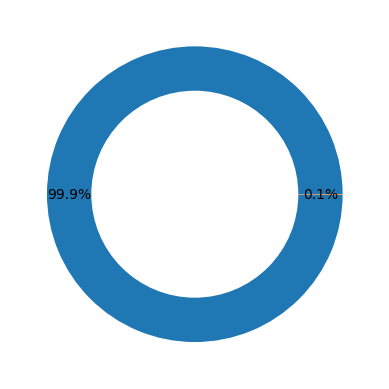

In [141]:


plt.pie(df.isFraud.value_counts(),
        autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [142]:
# class count
class_count_0, class_count_1 = df['isFraud'].value_counts()

# Separate class
class_0 = df[df['isFraud'] == 0]
class_1 = df[df['isFraud'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (6020183, 12)
class 1: (4359, 12)


total class of 1 and0: isFraud
0    4359
1    4359
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='isFraud'>

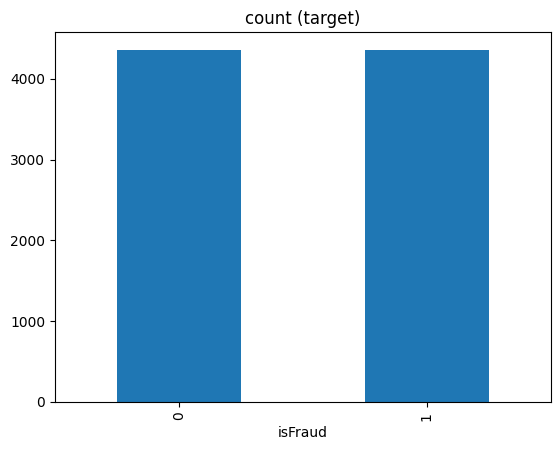

In [143]:
class_0_under = class_0.sample(class_count_1)

balancing_data = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",balancing_data['isFraud'].value_counts())# plot the count after under-sampeling
balancing_data['isFraud'].value_counts().plot(kind='bar', title='count (target)')

In [144]:
#New Dataset...
balancing_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
2070687,181,CASH_OUT,157786.83,C1270721813,0.00,0.00,C1407895183,1047209.83,1204996.66,0,0,0.00
3617647,273,PAYMENT,9919.24,C903017486,244550.34,234631.10,M828895362,0.00,0.00,0,0,9919.24
4541038,326,PAYMENT,7806.15,C384140680,202175.00,194368.85,M1373817307,0.00,0.00,0,0,7806.15
4470967,324,CASH_IN,9350.93,C1970683765,10733.00,20083.93,C185309214,427360.04,418009.10,0,0,-9350.93
793197,40,PAYMENT,18171.96,C827920987,240156.34,221984.39,M118592709,0.00,0.00,0,0,18171.95
...,...,...,...,...,...,...,...,...,...,...,...,...
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1,0,258355.42
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0,63416.99
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0,63416.99
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0,339682.13


In [145]:
balancing_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
2070687,181,CASH_OUT,157786.83,C1270721813,0.00,0.00,C1407895183,1047209.83,1204996.66,0,0,0.00
3617647,273,PAYMENT,9919.24,C903017486,244550.34,234631.10,M828895362,0.00,0.00,0,0,9919.24
4541038,326,PAYMENT,7806.15,C384140680,202175.00,194368.85,M1373817307,0.00,0.00,0,0,7806.15
4470967,324,CASH_IN,9350.93,C1970683765,10733.00,20083.93,C185309214,427360.04,418009.10,0,0,-9350.93
793197,40,PAYMENT,18171.96,C827920987,240156.34,221984.39,M118592709,0.00,0.00,0,0,18171.95


In [125]:
balancing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8718 entries, 4611926 to 6362615
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            8718 non-null   int64  
 1   type            8718 non-null   object 
 2   amount          8718 non-null   float64
 3   nameOrig        8718 non-null   object 
 4   oldbalanceOrg   8718 non-null   float64
 5   newbalanceOrig  8718 non-null   float64
 6   nameDest        8718 non-null   object 
 7   oldbalanceDest  8718 non-null   float64
 8   newbalanceDest  8718 non-null   float64
 9   isFraud         8718 non-null   int64  
 10  isFlaggedFraud  8718 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 817.3+ KB


In [146]:
balancing_data.type.unique()

array(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'],
      dtype=object)

In [147]:
balancing_data["type"] = balancing_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

# let's making our X and y variables and split the data into train-test split

In [148]:
X = balancing_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'balance_diff']].values
y = balancing_data.loc[:,'isFraud'].values

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=0)


In [237]:
X_train.shape,X_test.shape


((2179, 5), (6539, 5))

# Label Encoding

In [238]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[2.27030748e+00 1.45824875e+05 5.36626672e+05 4.55613203e+05
 8.10134687e+04]


In [239]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

# Implementing Model

In [240]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [241]:
y_prediction = model.predict(X_test)

In [242]:
y_prediction

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [243]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [244]:
print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train)) * 100}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_prediction) * 100}')


Training Accuracy: 100.0
Testing Accuracy: 98.50129989294999


In [196]:
  # Assuming 1 corresponds to the transaction type 'CASH_OUT'
model.predict([[ 1,               15000.0, 10000.0,0.0,  -10000.0]])

array([1], dtype=int64)

# Choosing Best Model Corresponding to the Given Problem

In [234]:

#Logistic Regression


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

LR = LogisticRegression()
LR.fit(X_train,y_train)




LogisticRegression()

In [235]:
lr_prediction = LR.predict(X_train)

print("training Accuracy",(accuracy_score(y_train,LR.predict(X_train))*100))

print("Testing Accuracy",(accuracy_score(y_train,lr_prediction)*100))


training Accuracy 92.52064851636587
Testing Accuracy 92.52064851636587


In [216]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

rm_model = RandomForestClassifier()
rm_model.fit(X_train, y_train)

RandomForestClassifier()

In [221]:
y_pred_score = rm_model.predict(X_train)
print("training Accuracy",(accuracy_score(y_train,rm_model.predict(X_train))*100))

print("Testing Accuracy",(accuracy_score(y_train,y_pred_score)*100))


training Accuracy 100.0
Testing Accuracy 100.0


In [228]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train, y_train)

XGB_predict = XGB.predict(X_train)
print("training Accuracy",(accuracy_score(y_train,XGB.predict(X_train))*100))

print("Testing Accuracy",(accuracy_score(y_train,XGB_predict*100)))

training Accuracy 99.70939125114714
Testing Accuracy 0.4993881921076782


# Conclusion
Suppose When We Use RandomForest Classifier then Our Model Become Overfit Model Which gives 100% Accuracy their for we Suggest you to Use Logistic Regression For Given Problem.